In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import pycaret.regression as pr

%matplotlib inline
model_name = 'auto_model'

# Automóveis


## Leitura da Base 

In [9]:
df_auto = pandas.read_csv('../Data/dataset_auto.csv',sep=';')
print(df_auto.shape)
df_auto.head()

(15000, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2020,20000,Manual,5000,Petrol,145,49.6,1.0,audi
1,A5,2017,19995,Semi-Auto,54000,Diesel,150,67.3,2.0,audi
2,A3,2017,11895,Manual,28334,Petrol,150,62.8,1.0,audi
3,Q7,2018,56900,Semi-Auto,5330,Diesel,145,39.2,4.0,audi
4,A4,2019,27160,Semi-Auto,17790,Diesel,145,47.9,2.0,audi


## Configuração do PyCaret 

In [8]:
auto_target_col = 'price'
ignore_features =
df_auto.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,audi A1,2020,20000,Manual,5000,Petrol,145,49.6,1.0,audi
1,audi A5,2017,19995,Semi-Auto,54000,Diesel,150,67.3,2.0,audi
2,audi A3,2017,11895,Manual,28334,Petrol,150,62.8,1.0,audi
3,audi Q7,2018,56900,Semi-Auto,5330,Diesel,145,39.2,4.0,audi
4,audi A4,2019,27160,Semi-Auto,17790,Diesel,145,47.9,2.0,audi


In [ ]:
pr.setup?

In [34]:
experiment = pr.setup(session_id=123,
                      data = df_auto, # Configurações de dados
                      train_size=0.6,
                      target = auto_target_col,
                      profile = False, # Analise interativa de variaveis
#                       fold_strategy = 'groupkfold', # Validação cruzada
                      fold = 10,
                      fold_groups = 'brand',
                      normalize = True,  # Normalização, transformação e remoção de variáveis
                      transformation = True, 
                      ignore_low_variance = True,
                      remove_multicollinearity = True,
                      multicollinearity_threshold = 0.95,
                      bin_numeric_features = ['year','tax'], # Binarizacao de variaveis
                      group_features = None, 
                      categorical_features = ['fuelType', 'transmission'],
                      ignore_features = None,
                      log_experiment = True, # Logging dos experimentos e afins
                      experiment_name = 'auto-model',
                      silent=True)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(15000, 10)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9000, 107)"


## Seleção de Modelos

In [42]:
# O PyCaret treina os modelos com hiperparametros defaults, sem ajuste fino.
model = pr.compare_models(sort='MSE', include=['lasso', 'dt', 'svm', 'rf'], n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1609.0405,6477903.2871,2536.4896,0.9476,0.1413,0.0969,2.2230
dt,Decision Tree Regressor,2053.6231,10675069.9298,3258.8935,0.9131,0.1816,0.1220,0.1090
lasso,Lasso Regression,2210.3423,10932856.2784,3296.7291,0.9116,0.2269,0.1327,3.8660
svm,Support Vector Regression,7317.5925,120874488.9603,10978.4406,0.0220,0.5108,0.4520,7.7840


## Ajuste de Hiperparâmetros 

In [43]:
tuned_model = pr.tune_model(model[0],
                            optimize = 'mse',
                            search_library = 'scikit-learn',
                            search_algorithm = 'random',
                            n_iter = 10)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1957.3196,8353351.7494,2890.2166,0.9188,0.1726,0.1262
1,1940.9599,7167051.8888,2677.1350,0.9346,0.1545,0.1165
2,2003.0318,13645193.0749,3693.9400,0.9023,0.1545,0.1144
3,2252.3194,13472402.7536,3670.4772,0.9024,0.1889,0.1381
4,2117.9018,12085994.8950,3476.4918,0.8984,0.1615,0.1199
5,2097.8962,11341677.8456,3367.7408,0.9094,0.1641,0.1193
6,2070.9310,9513783.2032,3084.4421,0.9263,0.1743,0.1255
7,2158.5874,10806639.8769,3287.3454,0.9033,0.1778,0.1334
8,2056.5033,10061746.9827,3172.0257,0.9231,0.1927,0.1385
9,2104.2869,9630263.0582,3103.2665,0.9251,0.1705,0.1254


## Avaliação do Modelo 

In [44]:
pr.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpretação dos Resultados 

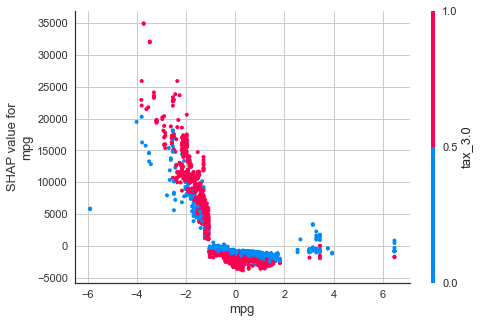

In [45]:
pr.interpret_model(tuned_model, plot='correlation', feature='mpg')

## Avaliação do Teste 

In [47]:
pred_holdout = pr.predict_model(tuned_model) # holdout set (test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2113.5915,13579395.7258,3685.0232,0.8860,0.1701,0.1223


## Finalização do Modelo para Produção

In [48]:
final_model = pr.finalize_model(tuned_model)
pred_final = pr.predict_model(final_model) # holdout set (test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1912.5382,10256414.2861,3202.5637,0.9139,0.1511,0.1107


## Exportação do Experimento 

In [ ]:
pr.save_model(final_model, model_name)